# NHAMCS Dataset:

In this notebook, we will be analysing The National Hospital Ambulatory Medical Care Survey (NHAMCS) Dataset. It is a dataset describing Emergency Departments in the US from various different states.

In [1]:
# The dataset is uploaded on Google Drive so we need to import the drive utility library

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


The next thing is to import the dataset and inspect it. We will be importing pandas from an SAS file into a pandas Dataframe.

In [2]:
# import pandas
import pandas as pd

# read the dataset from the SAS file
NHAMCS = pd.read_sas(filepath_or_buffer = '/content/drive/Shared drives/Vodafone Internship/Dataset/ed2017_sas.sas7bdat')

# inspect the first few records
print(NHAMCS.head())

# look at the dimensions of the dataframe

print(NHAMCS.shape)


   VMONTH  VDAYR  ARRTIME  WAITTIME  ...     CSTRATM  CPSUM       PATWT      EDWT
0     6.0    6.0  b'2056'      72.0  ...  40100000.0    4.0  3723.12641  21.58043
1     6.0    2.0  b'1417'      64.0  ...  40100000.0    4.0  3723.12641       NaN
2     6.0    2.0  b'2303'      -7.0  ...  40100000.0    4.0  3723.12641       NaN
3     6.0    5.0  b'0930'      29.0  ...  40100000.0    4.0  3723.12641       NaN
4     6.0    2.0  b'1332'      20.0  ...  40100000.0    4.0  3723.12641       NaN

[5 rows x 949 columns]
(16709, 949)


The dataframe has about 16.7 thousand examples and each of these has 949 features.

## Data Quality

In this section, we will be doing 2 things:
### 1- Encoding the Categorical Features

The first thing in this section is converting the categorical features into a numeric version of them, that could be input to different ML models. 

In [3]:
# check the different data types and the number of columns of each
print(NHAMCS.dtypes.value_counts())

object     554
float64    395
dtype: int64


In [4]:
# select the non-integer types in order to be encoded by the LabelEncoder

objectType = NHAMCS.select_dtypes('object')
print(objectType.head())

objectTypeColumnNames = objectType.columns

   ARRTIME   CAUSE1 CAUSE2 CAUSE3  ... RX30V3C1 RX30V3C2 RX30V3C3 RX30V3C4
0  b'2056'  b'W260'  b'-9'  b'-9'  ...      NaN      NaN      NaN      NaN
1  b'1417'    b'-9'  b'-9'  b'-9'  ...      NaN      NaN      NaN      NaN
2  b'2303'    b'-9'  b'-9'  b'-9'  ...      NaN      NaN      NaN      NaN
3  b'0930'    b'-9'  b'-9'  b'-9'  ...      NaN      NaN      NaN      NaN
4  b'1332'  b'W230'  b'-9'  b'-9'  ...      NaN      NaN      NaN      NaN

[5 rows x 554 columns]


In [5]:
# import the LabelEncoder Class
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# encode each column that had type of 'object' to a numeric equivalent using Label Encoder
for col in objectTypeColumnNames:
  NHAMCS[col] = labelencoder.fit_transform(NHAMCS[col].astype(str))


In [6]:
# Check the different dataypes after using the Label Encoder
print(NHAMCS.dtypes.value_counts())


int64      554
float64    395
dtype: int64


### 2- NaNs Exploration
>In this subsection of the data quality section, we explore the following:
- how many NaNs are there?
- how can we visualize them?
- what could be the reasons for these NaNs?
- further steps to be taken for data quality remarks.

### How many NaNs are there?


Count the number of NaNs Across all columns.

In [7]:
nans = NHAMCS.isnull().sum()

Order the series descendingly to be able to see those features with the most NaNs. These will most likely be eliminated from the dataset.

In [8]:
nans.sort_values(ascending = False, inplace = True)

Make sure all the features are captured.

In [9]:
nans.count() 

949

Let's have a quick look...

In [10]:
nans 

BLANK1       16709
BLANK4       16709
BLANK3       16709
BLANK2       16709
COMSTAT30    16708
             ...  
RX13V3C4         0
RX13V3C3         0
RX13V3C2         0
RX13V3C1         0
VMONTH           0
Length: 949, dtype: int64

We see that the first entries seem to have ALL NaNs! How prevalent is this? Let's see.

In [11]:
nans_max = nans[nans >= int(0.99*16709)]
nans_max.count()

52

In [12]:
448/949

0.4720758693361433

47% of the features are almost all NaNs! Let's continue to investigate different % of missing values. We exclude the ones with almost all NaNs.

In [13]:
nans_no_max = nans[nans < int(0.99*16709)]
nans_90 = nans_no_max[nans_no_max >= int((0.90*16709))]
print(nans_90.count())
print(104+448, 'features have 90%+ NaNs. That is', 552/949 *100, 'of the features.', 949-448, 'of 949 features have less than 90% NaN.')

25
552 features have 90%+ NaNs. That is 58.16649104320337 of the features. 501 of 949 features have less than 90% NaN.


What about those with 70% NaNs? (excluding the ones with 90%+ NaNs)

In [14]:
nans_70 = nans_no_max[nans_no_max > int((0.7*16709))]
nans_70.count()
print(134+552,'features have 70%+ NaNs. That is', 686/949*100,'of the features.',949-686, 'of 949 features have less than 70%+ NaNs.' )

686 features have 70%+ NaNs. That is 72.28661749209695 of the features. 263 of 949 features have less than 70%+ NaNs.


Some interesting findings. Let's visualize the NaN trend, descendingly.

### NaNs Trend Visualization

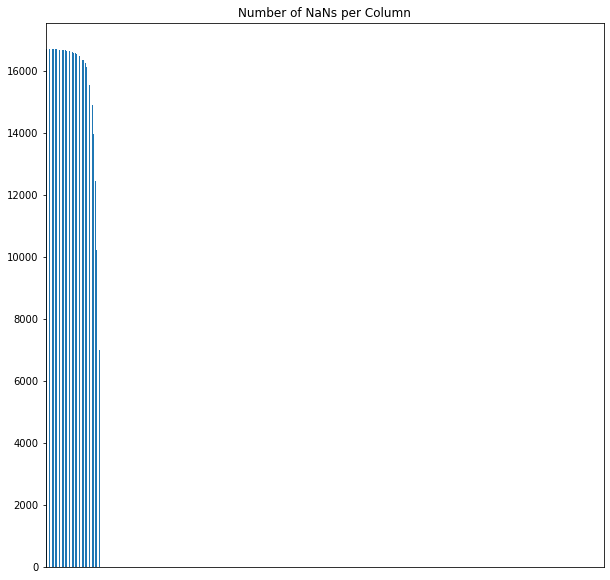

In [15]:
nans.plot(kind = 'bar', figsize = (10,10), title = 'Number of NaNs per Column', xticks = []);

### Why is so much data unavailable?

>From the plot, it seems like we have approximately 550 features whose missing values exceed 80%. Looking at the dataset, this is not exactly surprising. There are four mains reasons. 



#### 1. Information that could have concisely been represented is represented in multiple variables.


>##### EXAMPLE: Payment method. We could use feature engineering to just represent what the source of payment was.
><ol>
    <li>PAYPRIV = "Expected source(s) of payment for this visit: Private insurance"</li>
    <li>PAYMCARE ="Expected source(s) of payment for this visit: Medicare"</li>
    <li>PAYMCAID = "Expected source(s) of payment for this visit: Medicaid or CHIP or other state-based program"</li>
    <li>PAYWKCMP = "Expected source(s) of payment for this visit: Workers' compensation"</li>
    <li>PAYSELF = "Expected source(s) of payment for this visit: Self pay"</li>
    <li>PAYNOCHG = "Expected source(s) of payment for this visit: No charge/Charity"</li>
    <li>PAYOTH = "Expected source(s) of payment for this visit: Other"</li>
    <li>PAYDK = "Expected source(s) of payment for this visit: Unknown"</li>
    <li>PAYTYPER = "Recoded primary expected source of payment for this visit (based on hierarchy)"</li>
</ol>


#### 2. Some features, collectively, are a "list" for the same piece of information.


>##### EXAMPLE: Paitent's medications. Not all pateints are prescribed 30 medicines.
><ol>
    <li>MED1="Medication #1"</li>
    <li>MED2="Medication #2"</li>
    <li>MED3="Medication #3"</li>
    <li>MED4="Medication #4"</li>
    <li>...</li>
    <li>MED27="Medication #27"</li>
    <li>MED28="Medication #28"</li>
    <li>MED29="Medication #29"</li>
    <li>MED30="Medication #30"</li>
</ol>


#### 3. With or without reason 2, a collection of features represent a level of detail for the same information.

>##### EXAMPLE: Paitent's complaints. Along with the listing, there is a "level of detail" to the complaint.
><ol>
    <li>RFV1 = "Patient's complaint, symptom, or other reason for visit #1 - detailed category"</li>
    <li>RFV2 = "Patient's complaint, symptom, or other reason for visit #2 - detailed category"</li>
    <li>RFV3 = "Patient's complaint, symptom, or other reason for visit #3 - detailed category"</li>
    <li>RFV4 = "Patient's complaint, symptom, or other reason for visit #4 - detailed category"</li>
    <li>RFV5 = "Patient's complaint, symptom, or other reason for visit #5 - detailed category"</li>
    <li>...</li>
    <li>RFV13D = "Patient's complaint, symptom, or other reason for visit #1 - broader category"</li>
    <li>RFV13D = "Patient's complaint, symptom, or other reason for visit #2 - broader category"</li>
    <li>RFV13D = "Patient's complaint, symptom, or other reason for visit #3 - broader category"</li>
    <li>RFV13D = "Patient's complaint, symptom, or other reason for visit #4 - broader category"</li>
    <li>RFV13D = "Patient's complaint, symptom, or other reason for visit #5 - broader category"</li>
</ol>


#### 4. There are features that are reserved for only special pateints. 

>##### EXAMPLE: 'AGEDAYS' - age days for babies. This could be missing for the rest of the sample.
><ol>
    <li>AGE="Patient age in years"</li>
    <li>AGER="Age recode"</li>
    <li>AGEDAYS="Age in days for patients less than one year"</li>
</ol>




#### What are some key takeaways from these observations?

- All the reasons portray how well-suited this dataset is for a myriad of specific use cases and research, albeit with challenging and elongated data cleaning procedures. 

- Reasons 1 to 3 Feature engineering may also be used extensively to extract the essence of the required data for the problem at hand.

- Reason 4 unleashes an extremely important fact: Do not assume that, if 95% of a column's values are missing, that we could safely drop it. It might be catered for a specific use case and hence missing for the majority. For example, if the use case is to study which diseases result in ER visits for babies the most, although this feature could be mostly missing, it is actually important and the missing % is misleading.

- All reasons show us that we might not necessarily need to drop a column with high % of NaNs. From the special features of the available subset along with some domain research, we might be able to replace the missing data accurately.

### Further Comments and Prospective Steps

#### Missing Values Further Steps
- Investigate for also these values: [-9, -8, -7, 0]. -9 always means missing values, so we deal with that as such. However, -8 means "unknown" and -7 means "N/A". 0 may also mean "blank." For features extracted, according to the nature of each feature, we must decide what to do with entries with those values. Some examples include the below.

		
>**1. VALUE RESIDF**<br>
  >  -9='Blank'<br>
   > -8='Unknown'<br>
	1='Private residence'<br>
	2='Nursing home'<br>
	3='Homeless/homeless shelter'<br>
	4='Other'<br>
    
>**2. VALUE WAITTIMEF**<br>
    -9 ='Blank'<br>
    -7 ='Not Applicable'<br>
    
>**3. VALUE PAYTYPERF**<br>
      -9 ='All sources of payment are blank'<br>
      -8 ='Unknown'<br>
       1 ='Private insurance'<br>
       2 ='Medicare'<br>
       3 ='Medicaid or CHIP or other state-based program'<br>
       4 ="Worker's compensation"<br>
       5 ='Self-pay'<br>
       6 ='No charge/Charity'<br>
       7 ='Other'   <br>
 


<br>


- for the extracted features, based on the problem domain, available data %, and relationships with other features, how can we best replace those missing values? Extensive research is needed.


#### Data Quality Concerns For Further Investigation
- are the values consistent?
- are the types suitable?
- is the data too granular or too specific for a use case?
- is the data comprehensive for a use case?
- invesigate the data collection time and determine its relevance for today.
- is the data precise?
- are the features selected complete?



## Target Label

Given the dataset, we need to extract the label that we should be able to predict given the rest of the features. Firstly we wanted to predict the department that each patient should be redirected to. However, we couldn't find any information in the dataset regarding departments.

Instead, we decided to go with the immediacy level of each patient. In the dataset, the feature **"IMMEDR"** represents exactly that. Howeverm a key requirement has to be met: this feature has to be present in most examples. If this is not the case, then predicting it would be very difficult.

26.925608953258724% of the values are missing in the 'IMMEDR' feature


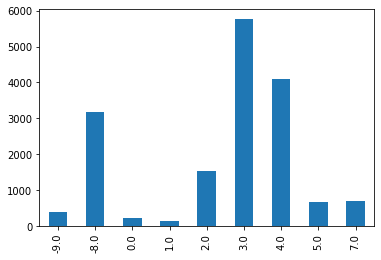

In [16]:
# Firstly, we will look at the percentage of the missing values (or blank) in the 'IMMEDR' column
missingValuesPercentage = (NHAMCS[NHAMCS['IMMEDR']==-9].shape[0] + NHAMCS[NHAMCS['IMMEDR']==-8].shape[0] + NHAMCS[NHAMCS['IMMEDR']==7].shape[0] +NHAMCS[NHAMCS['IMMEDR']==0].shape[0])/16709 *100
print(str(missingValuesPercentage) + "% of the values are missing in the 'IMMEDR' feature" )

# Only 27% is missing and therefore, we will still use it as our target variable
immediacyLevel = NHAMCS['IMMEDR']

# Observe the different values present in the target label
differentValues = immediacyLevel.value_counts().sort_index()

differentValues.plot.bar()

## Feature Selection

In the previous section, we extracted the target feature. As mentioned earlier, we have almost 950 features. Consequently, training a model using all of these features might not be the best idea. Consequently, we have to select some features out of the 950 features.

In order to do so, we devised a 2-step process:

### 1- Manual Extraction

Our first plan was to manually extract the features that 'make sense'. We inspected the textfiles describing the dataset and came up with about 150 features that could be useful. These can be found below:

In [17]:
# The patient ID
patID = NHAMCS[['PATCODE']]

# Demoggraphics of the patient
demographics = NHAMCS[['AGE', 'AGER', 'AGEDAYS', 'SEX', 'PATWT']]

# Data related to the ER visit
visit = NHAMCS[['WAITTIME', 'PAINSCALE', 'SEEN72', 'TOTDIAG']]

# The causes recorded for the patient's situation
causes = NHAMCS[['CAUSE1', 'CAUSE2', 'CAUSE3']]

# The proposed diagnoses for the patient as well as how probably each of them is
diagnoses = NHAMCS[['DIAG1', 'DIAG2', 'DIAG3', 'DIAG4']]
diagnosesProbable = NHAMCS[['PRDIAG1', 'PRDIAG2', 'PRDIAG3', 'PRDIAG4']]

# The complaints recorded by the patient in their previous visits
patientComplaintsDetailed = NHAMCS[['RFV1', 'RFV2', 'RFV3', 'RFV4']]
patientComplaintsBroad = NHAMCS[['RFV13D', 'RFV23D', 'RFV33D', 'RFV43D']]

# Data related to the patients injury (if any)
injuryData = NHAMCS[['INJURY', 'INJPOISAD', 'INJURY72', 'INTENT15', 'INJURY_ENC']]

# The patient's vitals
vitals = NHAMCS[['VITALSD', 'TEMPDF', 'PULSED', 'RESPRD', 'BPSYSD', 'BPDIASD']]

# The patient's disease history
previousDiseases = NHAMCS[['ETOHAB' ,'ALZHD','ASTHMA','CANCER','CEBVD','CKD','COPD','CHF','CAD',
                           'DEPRN','DIABTYP1','DIABTYP2','DIABTYP0','ESRD','HPE','EDHIV','HYPLIPID','HTN',
                           'OBESITY' ,'OSA' ,'OSTPRSIS', 'SUBSTAB', 'NOCHRON','TOTCHRON']]

# Blood test results (if any)
blood = NHAMCS[['ABG','BAC','BMP','BNP','BUNCREAT','CARDENZ','CBC','CMP','BLOODCX',
                'TRTCX','URINECX','WOUNDCX','OTHCX','DDIMER','ELECTROL','GLUCOSE','LACTATE','LFT','PTTINR','OTHERBLD','CARDMON',
                'EKG','HIVTEST','FLUTEST','PREGTEST','TOXSCREN','URINE']]

# Imaging results (if any)
imaging = NHAMCS[['ANYIMAGE','XRAY','CATSCAN','CTCONTRAST','CTAB','CTCHEST','CTHEAD','CTOTHER','CTUNK','MRI','MRICONTRAST','ULTRASND','OTHIMAGE']]

# The patient's medicine history
medications = NHAMCS[['MED1','MED2','MED3','MED4','MED5','MED6','MED7','MED8','MED9','MED10',
                      'MED11','MED12','MED13','MED14','MED15','MED16','MED17','MED18','MED19',
                      'MED20','MED21','MED22','MED23','MED24','MED25','MED26','MED27','MED28','MED29','MED30']]

# Any medicine prescribed in the ER 
ERMedications = NHAMCS[['GPMED1','GPMED2','GPMED3','GPMED4','GPMED5','GPMED6','GPMED7','GPMED8','GPMED9','GPMED10',
                        'GPMED11','GPMED12','GPMED13','GPMED14','GPMED15','GPMED16','GPMED17','GPMED18','GPMED19',
                        'GPMED20','GPMED21','GPMED22','GPMED23','GPMED24','GPMED25','GPMED26','GPMED27','GPMED28','GPMED29','GPMED30']]

manually_selected_features = pd.concat([patID, demographics, visit, causes, diagnoses, diagnosesProbable, patientComplaintsDetailed, patientComplaintsBroad, injuryData, 
                        vitals, previousDiseases, blood, imaging, medications, ERMedications], axis=1)

### 2- Feature Selection using SK Learn

After manually extracting about 150 features, we realized that this is still a large value and we decided to use the models from the feature_selection library provided in sklearn to select a small number out of these 150 features. 

In [18]:
# Import the SelectKBest Class, as well as the f_classif scoring metric
from sklearn.feature_selection import SelectKBest, f_classif

# create an instance of SelectKBest which will select the best 10 features
selector = SelectKBest(f_classif, k=10)

# Create a new dataframe with the only top 10 features that would affect our label (immediacyLevel)
X_new = selector.fit_transform(manually_selected_features, immediacyLevel)

# This part extracts the names of the features since the X_new does not contain column names
mask = selector.get_support() #list of booleans
new_features = [] # The list of your K best features
feature_names = manually_selected_features.columns
for bool, feature in zip(mask, feature_names):
  if bool:
    new_features.append(feature)

# Replace X_new with itself, along with the names of the columns
X_new = pd.DataFrame(X_new, columns=new_features)

# print the first 5 records of X_new to inspect it
print(X_new.head())

   PAINSCALE  SEEN72  TOTDIAG  BPSYSD  ...  CMP  OTHERBLD  CARDMON  EKG
0        5.0     2.0      0.0    -9.0  ...  0.0       0.0      0.0  0.0
1       -8.0     2.0      1.0    -9.0  ...  0.0       0.0      0.0  0.0
2       -9.0     2.0      0.0    -9.0  ...  0.0       0.0      0.0  0.0
3       -8.0     2.0      0.0    -9.0  ...  0.0       0.0      0.0  0.0
4       -9.0     2.0      1.0    -9.0  ...  0.0       0.0      0.0  0.0

[5 rows x 10 columns]


<br><br>
## Data Exploration
>In this subsection of the EDA, we explore the following:
- what columns do we have and what are their types?
- do we need to remedy the types?
- what does the data distribution look like? 
- Observations on data distribution
- What does correlation look like?

### Columns & Types

Let's view our selected columns.

In [19]:
X_new.columns

Index(['PAINSCALE', 'SEEN72', 'TOTDIAG', 'BPSYSD', 'BPDIASD', 'CBC', 'CMP',
       'OTHERBLD', 'CARDMON', 'EKG'],
      dtype='object')

Create a dataframe with both the features and target for convenience of future analysis.

In [20]:
dataset = pd.concat([X_new,NHAMCS['IMMEDR']], axis = 1 )

What types are they of?

In [21]:
X_new.dtypes

PAINSCALE    float64
SEEN72       float64
TOTDIAG      float64
BPSYSD       float64
BPDIASD      float64
CBC          float64
CMP          float64
OTHERBLD     float64
CARDMON      float64
EKG          float64
dtype: object

In [22]:
dataset['IMMEDR'].dtypes

dtype('float64')

Are the types appropriate? Let's investigate this by viewing the available values.

In [23]:
def viewValues(df,cols):
    for col in cols:
        print('The list of values for', col, ',along with their frequencies, are:')
        print(df[col].value_counts())
        print('-----------------------------------------------------------------------')


In [24]:
viewValues(X_new, ['PAINSCALE', 'SEEN72', 'TOTDIAG', 'BPSYSD', 'BPDIASD', 'CBC', 'CMP',
       'OTHERBLD', 'CARDMON', 'EKG'])

The list of values for PAINSCALE ,along with their frequencies, are:
-8.0     5270
 0.0     2985
 8.0     1402
 10.0    1266
 7.0      997
 5.0      853
 6.0      852
 9.0      739
 4.0      619
 2.0      559
-9.0      527
 3.0      497
 1.0      143
Name: PAINSCALE, dtype: int64
-----------------------------------------------------------------------
The list of values for SEEN72 ,along with their frequencies, are:
 2.0    14926
-8.0      986
 1.0      568
-9.0      229
Name: SEEN72, dtype: int64
-----------------------------------------------------------------------
The list of values for TOTDIAG ,along with their frequencies, are:
 0.0     4364
 1.0     3390
 2.0     1509
 5.0     1203
 4.0     1117
 6.0     1116
 3.0     1048
 7.0      917
 8.0      614
 9.0      427
 10.0     277
 11.0     199
-9.0      189
 12.0     127
 13.0      80
 14.0      48
 15.0      36
 16.0      20
 17.0      16
 18.0       7
 19.0       2
 20.0       2
 21.0       1
Name: TOTDIAG, dtype: int64
---------

### Adjusting Data Types

We need to parse those to numerics!

In [25]:
def toNumerics(df,cols):
    for col in cols:
        X_new[col] = pd.to_numeric(X_new[col])
     

In [26]:
toNumerics(X_new, ['PAINSCALE', 'SEEN72', 'TOTDIAG', 'BPSYSD', 'BPDIASD', 'CBC', 'CMP',
       'OTHERBLD', 'CARDMON', 'EKG'])

Let's re-check the data types.

In [27]:
X_new.dtypes

PAINSCALE    float64
SEEN72       float64
TOTDIAG      float64
BPSYSD       float64
BPDIASD      float64
CBC          float64
CMP          float64
OTHERBLD     float64
CARDMON      float64
EKG          float64
dtype: object

>Need to check...
- outliers
- how to replace the missing values
- consistency

### Viewing Features Distribution

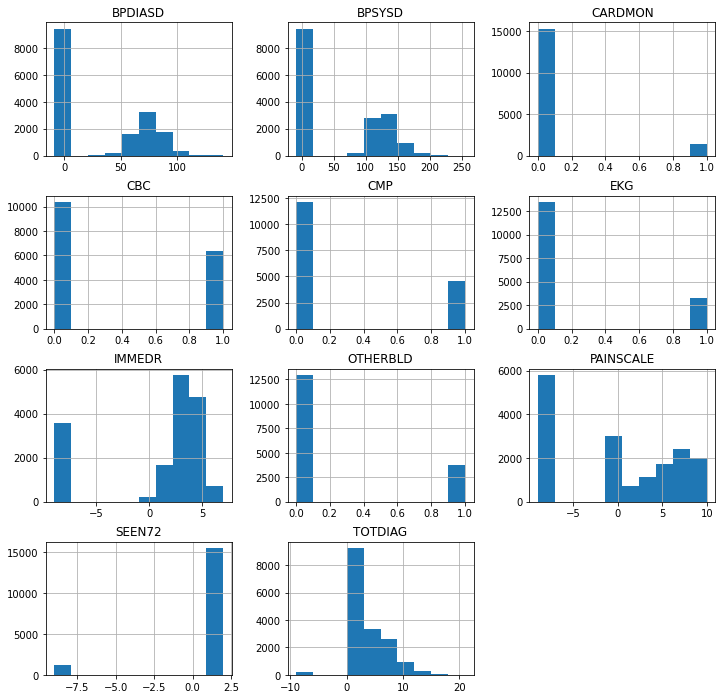

In [28]:
dataset.hist(figsize=(12,12));

### Important Oberservations

#### Features Descriptions
>SEEN72="Was patient seen in this ED within the last 72 hours?"<br>
>OTHERBLD="Other blood test"<br>
>CMP="Comprehensive metabolic panel (CMP)"<br>
>CARDMON="Cardiac monitor"<br>
>TOTDIAG="Total number of diagnostic services ordered or provided"<br>
>BPSYSD="Vitals after triage: Systolic blood pressure"<br>
>BPDIASD="Vitals after triage: Diastolic blood pressure"<br>
>PAINSCALE="How much pain a pateint is feeling from 1 (least painful) to 10 (most painful)"<br>
>n.b. couldn't find EKG, CBC<br>


#### Of our 11 features, we have 6 binary features.

 - 'SEEN72': This one has only valid one value, and the other is a missing value. Is it really useful? What does it tell us with relation to other labels?

 - 'OTHERBLD', 'EKG', 'CMP', 'CBC', 'CARDMON': 0 or 1. Seems fair. However, There is bias, with varying extents, towards 0, and we must invesitgate this. Why is this the case? It is sampling noise? or is it truly common?

#### The remaining five features, exlcuding missing values, show normal distribution.
- 'TOTDIAG': Right skewed normal distribution.
- 'PAINSCALE': Left skewed normal distribution.
- 'IMMEDR','BYPSYSD','BPDIASD': not skewed.


#### Why does this matter?
- The normal distribution helps us deal with data in specific ways. For example, according to skewness, we may find a best central measure.
     

Now that we've seen the data distribution itself, let's see the correlation with the label...

### Correlation Heatmap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


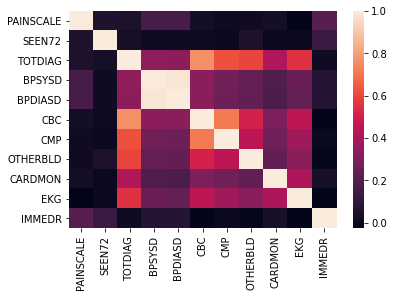

In [29]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

Barely any! Why?

<br><br>

## Suggestions
### Feature Selection

**Our manual feature extraction was domain-based.** Since we've noticed we were not qualified enough to do this due to how techinical the terms where, and recognizing the patterns discussed in the missing data section, we propose the following methodology:
        <ol>
            <li>Extract the prefixes of the labels.</li>
            <li>Group the features by common prefixes in separate dataframes. Each of the dataframes will represent all variables that describe the same piece of info using listing and different levels of detail.</li>
            <li>There will be exceptions, but not expected to be many. We will manually group the **remainder**.</li>
        </ol>
   
**How do we work around the KBest Selector?**
We propose to perform it over each of the dataframes from the previous point, applying it only to none-NaNs. After we extract those columns that do have their information available, depending on the use case, we can start taking variables with missing data and fill them with research that identifies what variables may be linked to them, THEN use these variables to determine exactly how to fill the missing values.
​


​**Use the SelectKBest model on the whole 949-feature Dataset**

Another approach we are considering is that instead of doing any manual extraction of any type, we simply pass the whole dataframe to the SelectKBest model and let it extract the features it cosniders best. However, this approach has a major problem which is that many of these features have NaN values and the **SelectKBest** does not accept NaN values.
​
​